In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load and explore the original dataset and the aggregated dataset by district
data = pd.read_csv('../assignments/toronto-crime-rates-by-district.csv')
aggr_data = pd.read_csv('../assignments/aggregated-autotheft-by-district-2023.csv')

In [24]:
data.head()

,_id,AREA_NAME,HOOD_ID,ADMIN_DISTRICT,POPULATION_2023,ASSAULT_2014,ASSAULT_2015,ASSAULT_2016,ASSAULT_2017,ASSAULT_2018,...,THEFTOVER_RATE_2014,THEFTOVER_RATE_2015,THEFTOVER_RATE_2016,THEFTOVER_RATE_2017,THEFTOVER_RATE_2018,THEFTOVER_RATE_2019,THEFTOVER_RATE_2020,THEFTOVER_RATE_2021,THEFTOVER_RATE_2022,THEFTOVER_RATE_2023
0,1,South Eglinton-Davisville,174,Old City of Toronto,21987,63,61,70,82,85,...,21.903406,16.334532,21.590111,5.237247,15.232292,14.822866,24.197842,28.634151,14.006910,36.385136
1,2,North Toronto,173,Old City of Toronto,15077,45,52,43,52,55,...,17.198383,25.911211,17.305529,16.500288,39.413528,30.234316,43.830814,14.241971,27.502750,46.428333
2,3,Dovercourt Village,172,Old City of Toronto,13837,56,57,79,94,94,...,36.786346,22.218931,37.180248,22.146759,29.146021,21.698250,21.709240,14.541224,29.008631,21.681000
3,4,Junction-Wallace Emerson,171,Old City of Toronto,26240,154,157,166,157,157,...,21.288372,20.975794,24.753496,24.404133,27.956388,15.754854,35.254025,31.309929,31.035419,34.298782
4,5,Yonge-Bay Corridor,170,Old City of Toronto,14731,394,524,487,603,576,...,358.527130,274.197968,233.301651,289.951111,349.539246,481.909271,259.798096,188.651871,358.826416,346.208679


In [25]:
# display the details of the aggregated dataset
aggr_data

,ADMIN_DISTRICT,TOTAL_AUTOTHEFT_2023,POPULATION_2023
0,East York,372,124515
1,Etobicoke,2817,398860
2,North York,3692,743686
3,Old City of Toronto,2085,914087
4,Scarborough,2553,682571
5,York,494,148589


In [26]:
# sorting the district feature by auto thefts in ascending order
sorted_df = aggr_data.sort_values(by="TOTAL_AUTOTHEFT_2023", ascending=True)
sorted_df

,ADMIN_DISTRICT,TOTAL_AUTOTHEFT_2023,POPULATION_2023
0,East York,372,124515
5,York,494,148589
3,Old City of Toronto,2085,914087
4,Scarborough,2553,682571
1,Etobicoke,2817,398860
2,North York,3692,743686


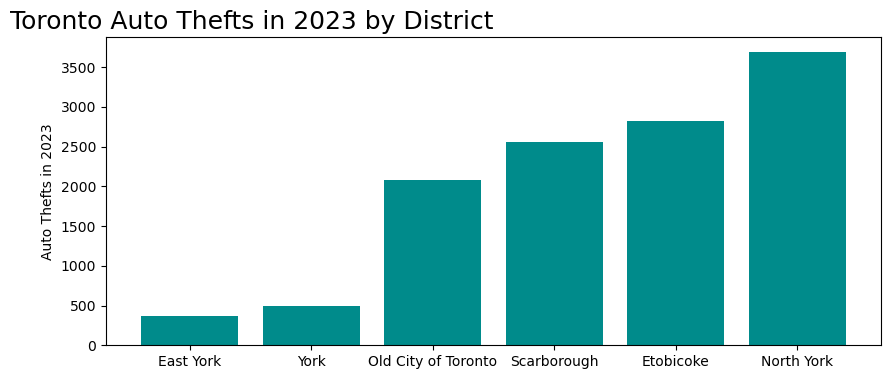

In [27]:
# prepare data for x- and y-axis
x = np.array(sorted_df["ADMIN_DISTRICT"])
y = np.array(sorted_df["TOTAL_AUTOTHEFT_2023"])

# define our figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
plt.tick_params(axis='both', which='major', labelsize=10)

# customize the chart
ax.bar(x, y, color = "darkcyan")
ax.set_ylabel('Auto Thefts in 2023')
ax.set_title('Toronto Auto Thefts in 2023 by District', ha = 'right', fontsize = 18)

# save the chart as an image and close the chart
plt.savefig('a4_barchart.png')
plt.show()
plt.close()

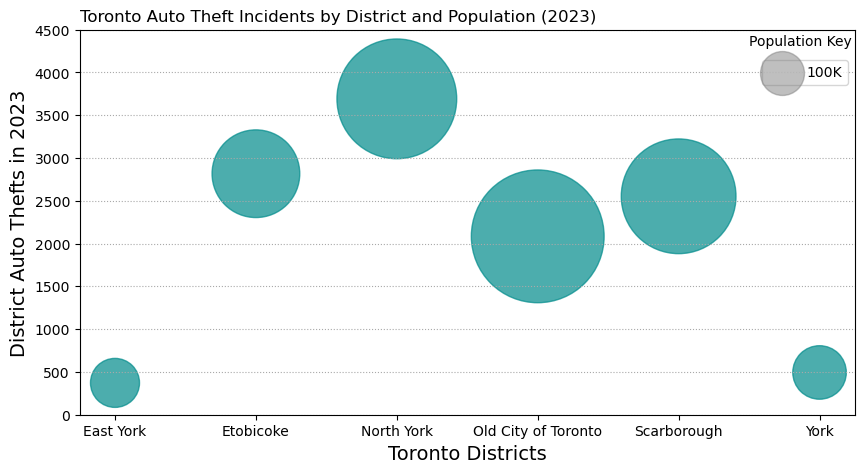

In [28]:
# set up a bubble plot
plt.figure(figsize=(10, 5))
plt.scatter(aggr_data['ADMIN_DISTRICT'],
            aggr_data['TOTAL_AUTOTHEFT_2023'],
            s=aggr_data['POPULATION_2023']/100,
            alpha=0.7,
            color = 'darkcyan')

# add and customize labels, titles, and gridlines
plt.xlabel('Toronto Districts', fontsize = 14)
plt.ylabel('District Auto Thefts in 2023', fontsize = 14)
plt.title('Toronto Auto Theft Incidents by District and Population (2023)', loc = 'left')
plt.ylim(0, 4500)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(axis='y', linestyle = ':', color = 'darkgray')

# add legend
legend_handle = plt.scatter([], [], s=1000, alpha=0.5, color='gray', label='100K')
plt.legend(handles=[legend_handle],
           loc='best',
           bbox_to_anchor = (1, 0.94),
           fontsize = 10,
           edgecolor = None)

# add legend key
plt.text(4.5, 4320, 'Population Key', ha='left')

# save the chart as an image and close the chart
plt.savefig('a4_bubblechart.png')
plt.show()
plt.close()
